# Opis zbioru
Zbiór danych został pobrany z witryny [kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download), zawiera informacje na temat pacjentów - 13 atrybutów opisujących stan zdrowia i parametry biologiczne oraz jeden tzw. "target value" określający czy dana osoba została dotknięta chorobą serca czy też nie. Kolejne atrybuty uwzględnione w zbiorze danych:
- wiek [age],
- płeć [sex],
- typ bólu w klatce piersiowej [cp],
- ciśnienie krwi [trestbps],
- poziom cholesterolu [chol],
- występowanie poziomu cukru we krwi większego od 120mg/dl [fbs],
- maksymalne tętno [thalach],
- wyniki elektrokardiograficzne [restecg],
- występowanie bólu w klatce wywołanego wysiłkiem fizycznym (dławica piersiowa) [exang],
- obniżenie odcinka [ST](https://pl.wikipedia.org/wiki/Odcinek_ST) wywołane wysiłkiem fizycznym [oldpeak],
- nachylenie szczytowego wysiłkowego odcinka ST [slope]
- liczba głównych naczyń zabarwionych w wyniku fluoroskopii [thai],
- występowanie choroby serca [target]. <br> 

Dane pochodzą z eksperymentu - 1025 obserwacji. <br>


# Wczytanie danych i analiza eksploracyjna

In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Jak widać powyżej atrybuty sex, cp, fbs, exang, target - w rzeczywistości zmienne jakościowe-porządkowe, zostały w zbiorze danych zaprezentowane jako zmienne ilościowe-dyskretne (a w zasadzie dychotomiczne) - liczby binarne 0 i 1. Z tego względu liczenie statystyk opisowych czy tworzenie modeli uczenia maszynowego nie powinno być kłopotliwe. Wartość 1 dla atrybutu sex określa mężczyznę a 0 kobietę.

### Informacje o typach danych i sprawdzenie istnienia wartości pustych

In [2]:
print(df.info()) 
print(df.isnull().sum())
# print(df.describe()) - liczy wiekszosc statystyk opisowych dla wszystkich atrybutów

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Brak wartości pustych.

### Poglądowa analiza korelacji między zmiennymi

<AxesSubplot:>

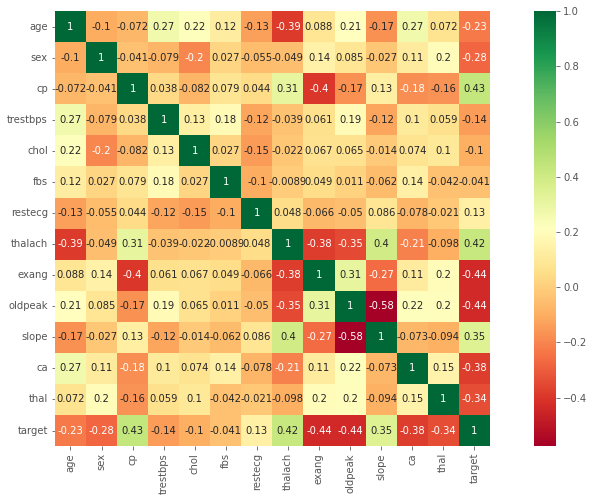

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', annot=True)

Największa ujamna korelacja występuję między atrybutami slope oraz oldpeak, sugeruje to że wraz ze wzrostem wartości jednej z cech druga obniża swoją wartość. Można było zakładać istnienie pewnej korelacji między tymi atrybutami, ponieważ oba z nich odnoszą się do odcinka ST. Mimo wszystko jest to nadal korelacja słaba. Ponadto żaden z atrybutów nie jest znacząco skorelowany ze zmienną określającą diagnozę (target).

Na potrzeby testu statystycznego i sformułowania poprawnej hipotezy podzieliłem obecną próbę na dwie - kobiet i mężczyzn. Dodatkowo pominąłem atrybuty, które nie będą przydatne w teście. Tablice men i women zawierając wartości atrybutów określających diagnozę dla odpowiednio mężczyzn oraz kobiet.

In [4]:
# specificzne przypisanie przez list comprahension, aby nie było problemów z indeksami  
men = [_ for _ in df[df.sex==1].target]
women = [_ for _ in df[df.sex==0].target]

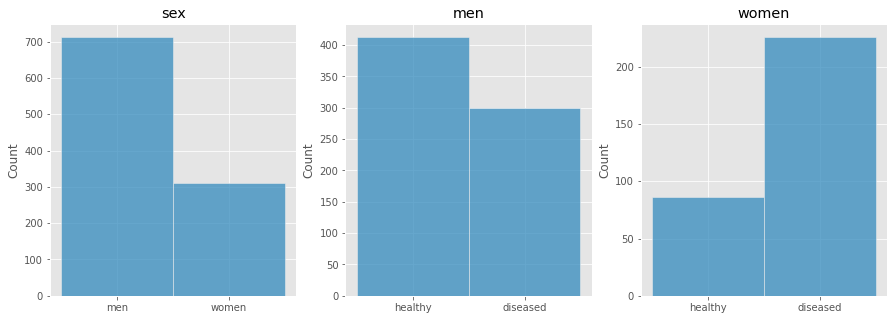

Liczba badanych kobiet: 312
Liczba badanych mężczyzn: 713


In [5]:
def drawHist(data, v1, v2, n, title=''):
    temp = ['']*len(data)
    for i in range(len(temp)): 
        if data[i] == 0: temp[i]=v1 
        else: temp[i]=v2
            
    plt.subplot(1,3,n)
    sns.histplot(temp)
    axes[n-1].set_title(title)

_, axes = plt.subplots(1, 3, figsize=(15, 5))
drawHist(df.sex, 'women', 'men', 1, 'sex')
drawHist(men, 'healthy', 'diseased', 2, 'men')
drawHist(women, 'healthy', 'diseased', 3, 'women')
plt.show()

# Dokładne liczności kobiet oraz mężczyzn
print("Liczba badanych kobiet: {}\nLiczba badanych mężczyzn: {}".format(np.shape(women)[0], np.shape(men)[0]))

Jak łatwo odczytać z pierwszego histogramu liczba mężczyzn ze zbioru danych jest ponad dwukrotnie większa od liczby kobiet. Kształty histogramów 2 i 3 raczej średnio przypominają rozkład normalny (szczególnie 3), dlatego nie wnioskuję na ich podstawie, że nasze zmienne $\sim N(\mu,\sigma)$. Widzimy też, że zdrowych mężczyzn jest więcej niż chorych, natomiast badane kobiety częściej słyszały nieprzyjemną diagnozę.

# Hipoteza, wybór testu


Hipoteza, którą chciałbym sprawdzić odnosi się do odsetka kobiet ze zdiagnozowaną chorobą sercą. Jako że w społeczeństwie istnieje stereotyp, że to mężczyźni częściej zmagają się z tego typu chorobami, a nie wskazuje na to wykonana przeze mnie wstępna analiza eksploracyjna - chcę sprawdzić czy liczba chorych kobiet jest większa od chorych mężczyzn (stosunek 60% do 40%), dla populacji osób z pewnymi objawami, które mogą wskazywać na występowanie choroby (np. ból w okolicach klatki piersiowej). Mam świadomość, że nie jest to wybitna hipoteza jednak wstępna analiza danych wskazuje na to, że obserwacje z próbki (ludzie) - chorują na serce częściej niż w 50% przypadków a w populacji wszystkich ludzi ten odsetek jest oczywiście znacząco mniejszy. Aby poprawnie sformułować hipotezy podzieliłem populacje na kobiety oraz mężczyzn, dlatego interesować będzie mnie różnica średnich:

$$ H_{0}: \mu_{k}-\mu_{m} = 0.2 $$ 
$$ H_{1}: \mu_{k}-\mu_{m} > 0.2 $$

Jako że wartości atrybutu target są binarne można wykorzystać fakt, że tworzą rozkład dwumianowy - średnia wartość to jednocześnie prawdopodobieństwo sukcesu ($\mu = p$). Jako sukces mam na myśli wylosowanie z danej próby, obserwacji, dla której wartość target wynosi 1. Dzięki temu możemy wyznaczyć estymowane odchylenie standardowe zgodnie ze wzorem na odchylenie standardowe dla sumy/średniej w rozkładzie dwupunktowym. Dodatkowo sprawdzając warunki $np>5, \,\,\,\, n(1-p)>5$ dla każdej z populacji moglibyśmy zastosować centralne twierdzenie graniczne, jednak w dalszej części sprawozdania, w celu usprawnienia obliczeń i tak korzystałem z wbudowanych funkcji liczących wariancje.

$$D[S_n] = \sqrt{np(1-p)} \\ $$
$$D[\bar X] = \sqrt{\frac{p(1-p)}{n}}$$

Histogram przypisany do atrybutu płeć nie przypomina kształtem rozkładu normalnego, lecz próba jest bardzo duża więc mogę zastosować Centralne Twierdzenie Graniczne i założyć że rozkłady naszych zmiennych są w przybliżeniu normalne. <br>

Skorzystam z testu T dla dwóch niesparowanych populacji - wariant dla różnych wariancji (ponieważ nie znam ich wartości, zakładam że są różne): 

$$ T = \frac{(\bar{X_k} - \bar{X_m})-(\mu_k - \mu_m)}{\sqrt{\frac{s_k^2}{n_k}+\frac{s_m^2}{n_m}}} $$


Dodatkowo jako że mamy bardzo dużą liczbę stopni swobody, w obliczeniach zastosuję przybliżenie rozkładu T - standardowym rozkładem normalnym.




Jako poziom istotności przyjmę $\alpha$ na poziomie 0.01.

# Obliczenie statystyki testowej

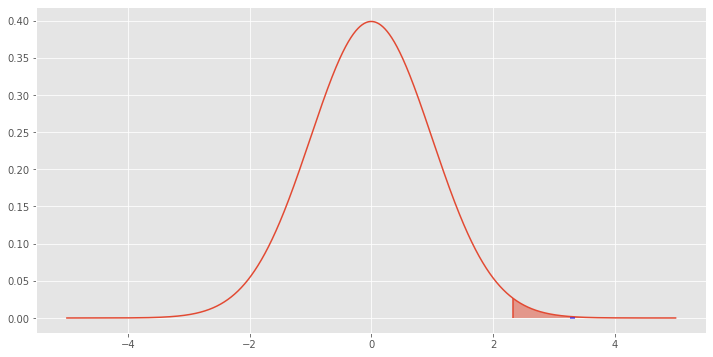

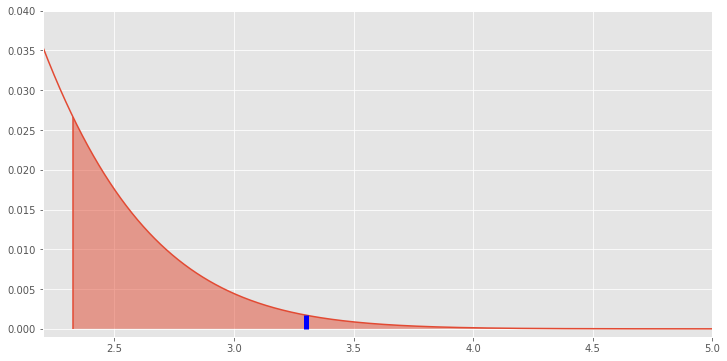

Z: 3.3021826435965362   z_kryt: 2.3263478740408408

Odrzucamy H0 na rzecz H1!


In [10]:
from scipy.stats import norm

def solve(men, women, alfa):
    n_m = np.shape(men)[0] # rozmiary próbek
    n_k = np.shape(women)[0]

    x_m = np.mean(men) # średnie z próbek, prawdopodobieństwo wylosowania osoby z pozytywną diagnozą
    x_k = np.mean(women)

    s_m = np.var(men,ddof=1) # estymatory wariancji
    s_k = np.var(women,ddof=1)

    Z = ((x_k - x_m) - 0.2) / np.sqrt(s_k/n_k + s_m/n_m) # wartość statystyki testowej

    crit = norm.ppf(alfa) # wartość krytyczna
    
    makePlot(crit,alfa,Z,False)
    makePlot(crit,alfa,Z,True)
    
    print("z_kryt: {}   Z: {}\n".format(crit,Z))
    if (Z > crit):
        print('Odrzucamy H0 na rzecz H1!')
    else: 
        print('Brak podstaw do odrzucenia H0!')
        
def makePlot(crit_z, a, Z, flag):
    plt.figure(figsize=(12,6))
    x = np.linspace(-5,5,10000)
    plt.plot(x, norm.pdf(x))
    plt.vlines(crit_z, 0, norm.pdf(crit_z), linestyles ='solid')
    plt.vlines(Z,0,norm.pdf(Z),linestyles='solid',colors='b',linewidth=5)
    plt.fill_between(x, norm.pdf(x), where=(crit_z<x), alpha=0.5)
    if(flag):
        plt.xlim(2.2,5)
        plt.ylim(-0.001,0.04)
    plt.show()

solve(men, women, 0.99)

# Interpretacja wyników
Jak dobrze widać na drugim wykresie wartość wyliczonej statystyki znajduje się w obszarze krytycznym (niebieska linia). Z tego względu odrzucamy H0 na rzecz H1. Wynik testu sugeruje, że możemy mięć 99% przekonanie o tym, że w populacji osób, u których zauważono pewne objawy sugerujące możliwą chorobę serca, takowa rzeczywiście występuję u większej ilości kobiet niż mężczyzn, w stosunku przynajmniej 60% do 40%.


# Dodatki
Przy pomocy bilbioteki scikit-learn i zawartych w niej klasyfikatorów postanowiłem zbudować kilka modelów uczenia maszynowego, przewidujących diagnozę.

### k-Nearest Neighbors
Metoda przewidująca na podstawie obserwacji 'k najbliżych sąsiadów' - najbliżej położonych punktów w przestrzeni.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('target',axis=1)
y = df.target

knns = [] # tablica przechowująca klasyfikatory

for i in range(1,6):
    # wywołanie konstruktora klasyfikatora dla i sąsiadów
    knn = KNeighborsClassifier(n_neighbors=i)
    knns.append(knn)

# podział danych na części na których będziemy trenować i testować model
# rozmiar zbioru do testowania to 30% wszystkich danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

for i, knn in enumerate(knns):
    # trenowanie modelu na zbiorze treningowym
    knn.fit(X_train, y_train)
    # wartość określająca jak skuteczny jest model, na podstawie zbioru testowego
    print("{} --- {}".format(i+1, knn.score(X_test, y_test)))

1 --- 0.9902597402597403
2 --- 0.9318181818181818
3 --- 0.8506493506493507
4 --- 0.7727272727272727
5 --- 0.7012987012987013


W tym przypadku nasz model spisuje się najlepiej dla 1 sąsiada, zgadując poprawnie diagnozę z około 99% skutecznością. To bardzo dobry wynik, którym jestem dość zaskoczony. <br> <br> Dodatkowo możemy dokładniej przeanalizować skuteczność modelu korzystając z tzw. macierzy konfuzji:

<table>
    <thead>
        <tr>
            <th></th>
            <th>Predykcja: A</th>
            <th>Predykcja: B</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Rzeczywistość: A</td>
            <td>True Positive (tp)</td>
            <td>False Negative (fn)</td>            
        </tr>
        <tr>
            <td>Rzeczywistość: B</td>
            <td>False Positive (fp)</td>
            <td>True Negative (tn)</td>
        </tr>
    </tbody>
</table>

W macierzy konfuzji z reguły to co nas interesuje przypisujemy do klasy pozytywnej - w naszym przypadku chcemy określić czy diagnoza wskazuje na występowanie choroby (zdarzenie A). <br>
Dzięki wskazanym wartościom można obliczyć przydatne w kontekście analizy wartości takie jak: <br><br>
`Accuracy`: $$ \frac{t_p + t_n}{t_p + t_n + f_p + f_n} $$ <br>
`Precision`: $$ \frac{t_p}{t_p + f_p} $$ <br>
`Recall` (inaczej sensitivity lub true positive rate (tpr)): $$ \frac{t_p}{t_p + f_n} $$ <br>
`Specificity`: $$ \frac{t_n}{t_n + f_p} $$ <br>
`F1 score` (średnia harmoniczna z precision i recall): $$ 2 \times \frac{precision \times recall}{precision + recall} $$ <br>

### Regresja logistyczna
Pomimo nazwy jest używana w problemach związanych z klasyfikacją. Zwraca wartości prawdopodobieństwa uzyskania określonej zmiennej objaśnianej (target), gdy $ p > 0.5 $ przypisuje do niej wartość 1, w przeciwnym przypadku 0. Można w niej manipulować progiem prawdopodobieństwa jaki jest potrzebny do uzyskania określonej wartości.<br> <br> Najpierw dokonam normalizacji danych aby zwiększyć efektywność modelu, skorzystam w tym celu z potoku (Pipeline) aby proces wprowadzania danych do modelu był w pełni automatyczny.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression())]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

pipeline = Pipeline(steps) # utworzenie potoku dla zdefiniowanych kroków
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test) # predykcja dla zbioru testowego
print(confusion_matrix(y_test, y_pred)) # macierz konfuzji
print(classification_report(y_test, y_pred)) # raport klasyfikacji

[[119  40]
 [ 20 129]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



Dzięki macierzy konfuzji uzyskałem dokładniejszy obraz naszego modelu, który przewiduje diagnozy w sposób poprawny w około 80% przypadków. <br> <br> Ostatnią rzeczą jaką wykonam jest skorzystanie z krzywej ROC, która również jest pewną metodą oceny jakości klasyfikatora, a w zasadzie pole pod jej wykresem (AUC), które im bliższe wartości 1, tym lepszy jest model. Krzywa ROC jest zbiorem punktów wartości tpr(true positive rate) i fpr(false positive rate) dla każdego możliwego progu prawdopodobieństwa.

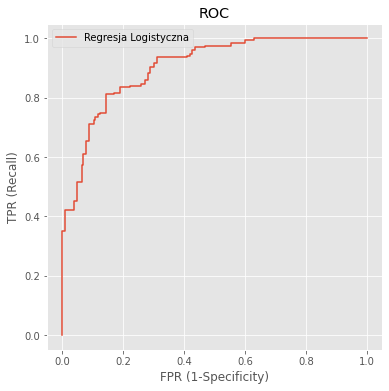

AUC: 0.9028227341964965


In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# zwraca 2 kolumny, każda zawiera prawdopodobieństwa dla określonej wartości atrybutu target
# wybieram tą, w której przewidywane są wartości 1 - choroba serca
y_pred = pipeline.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Regresja Logistyczna')
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Recall)')
plt.title('ROC')
plt.legend()
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred)))

Klasyfikator jest przyzwoity ponieważ pole pod krzywą (AUC) jest bliskie 1.


## Sprawozdanie przygotował Kamil Kałużny 148121 grupa I1.2